In [ ]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
df = pd.read_json('News_Category_Dataset_v3.json', lines=True)[['headline', 'category']]
df.head()

,headline,category
0,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS
1,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS
2,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY
3,The Funniest Tweets From Parents This Week (Se...,PARENTING
4,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS


In [ ]:
df.category.value_counts()

,count
category,
POLITICS,35602
WELLNESS,17945
ENTERTAINMENT,17362
TRAVEL,9900
STYLE & BEAUTY,9814
PARENTING,8791
HEALTHY LIVING,6694
QUEER VOICES,6347
FOOD & DRINK,6340


In [ ]:
desired_categories = ['CRIME', 'COMEDY', 'WEDDINGS', 'SPORTS']
df_new = df[df['category'].isin(desired_categories)]
df_new.head()

,headline,category
2,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY
17,"Maury Wills, Base-Stealing Shortstop For Dodge...",SPORTS
26,"Las Vegas Aces Win First WNBA Title, Chelsea G...",SPORTS
61,Boston Marathon To Make Race More Inclusive Fo...,SPORTS
62,"Anthony Varvaro, MLB Pitcher Turned Transit Co...",SPORTS


In [ ]:
df_new.category.value_counts()

,count
category,
COMEDY,5400
SPORTS,5077
WEDDINGS,3653
CRIME,3562


In [ ]:
min_samples = 3562 # we have these many EDUCATION articles


df_business = df_new[df_new.category=="COMEDY"].sample(min_samples, random_state=2022)
df_sports = df_new[df_new.category=="SPORTS"].sample(min_samples, random_state=2022)
df_crime = df_new[df_new.category=="CRIME"].sample(min_samples, random_state=2022)
df_weddings = df_new[df_new.category=="WEDDINGS"].sample(min_samples, random_state=2022)

In [ ]:
df_balanced = pd.concat([df_business,df_sports,df_crime,df_weddings],axis=0)
df_balanced.category.value_counts()

,count
category,
COMEDY,3562
SPORTS,3562
CRIME,3562
WEDDINGS,3562


In [ ]:
df_balanced['category_num'] = df_balanced['category'].map({
    'COMEDY': 0,
    'SPORTS': 1,
    'CRIME': 2,
    'WEDDINGS': 3
})

In [ ]:
df_balanced.tail()

,headline,category,category_num
179337,How My Dream Wedding Has Evolved In The Past 1...,WEDDINGS,3
180820,Amber Tamblyn's Wedding Dress: Actress Reveals...,WEDDINGS,3
208201,It's National Marriage Week. Oh Please.,WEDDINGS,3
207216,Bizarre Wedding Invites Couples Are Sending Ou...,WEDDINGS,3
160782,Gay Marriage: Jim Eastin and Allan Murdock Mar...,WEDDINGS,3


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df_balanced.headline,
    df_balanced.category_num,
    test_size=0.2, # 20% samples will go to test dataset
    random_state=2023,
    stratify=df_balanced.category_num
)

In [ ]:
print(X_train.shape)
X_train.head()

(11398,)


,headline
117135,St. Louis Cop Shot Black Teen 6 Times In Back ...
10865,Watch Conan O'Brien Lose His Mind After Downin...
58762,Shooting At Connecticut House Party Wounds 13
151820,Adnan Januzaj Goals Lift Manchester United Pas...
86653,"Stephen Colbert Insults A Billy Goat, Scaring ..."


In [ ]:
y_train.value_counts()

,count
category_num,
2,2850
0,2850
1,2849
3,2849


In [ ]:
y_test.value_counts()

,count
category_num,
3,713
1,713
0,712
2,712


In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer

#1. create a pipeline object
clf = Pipeline([
     ('vectorizer_bow', CountVectorizer(ngram_range = (1, 1))), #using the ngram_range parameter
     ('Multi NB', MultinomialNB())
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.81      0.83       712
           1       0.89      0.85      0.87       713
           2       0.92      0.90      0.91       712
           3       0.87      0.95      0.91       713

    accuracy                           0.88      2850
   macro avg       0.88      0.88      0.88      2850
weighted avg       0.88      0.88      0.88      2850



In [ ]:
clf = Pipeline([
    ('vectorizer_1_2_gram', CountVectorizer(ngram_range = (1, 2))),        #using the ngram_range parameter
     ('Multi NB', MultinomialNB())
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.82      0.85       712
           1       0.89      0.86      0.87       713
           2       0.92      0.91      0.92       712
           3       0.86      0.95      0.91       713

    accuracy                           0.89      2850
   macro avg       0.89      0.89      0.89      2850
weighted avg       0.89      0.89      0.89      2850



In [ ]:
clf = Pipeline([
    ('vectorizer_1_3_grams', CountVectorizer(ngram_range = (1, 3))),        #using the ngram_range parameter
     ('Multi NB', MultinomialNB())
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84       712
           1       0.89      0.85      0.87       713
           2       0.92      0.91      0.92       712
           3       0.86      0.95      0.91       713

    accuracy                           0.89      2850
   macro avg       0.89      0.89      0.88      2850
weighted avg       0.89      0.89      0.88      2850



In [ ]:
import spacy

nlp = spacy.load("en_core_web_sm")

def preprocess(text):
    doc = nlp(text)
    filtered_tokens = []
    for token in doc:
        if not token.is_stop and not token.is_punct:
            filtered_tokens.append(token.lemma_)
    return " ".join(filtered_tokens)

In [ ]:
df_balanced['preprocessed_txt'] = df_balanced['headline'].apply(preprocess)
df_balanced.head()

,headline,category,category_num,preprocessed_txt
15312,"Trevor Noah Calls Out Hillary Clinton, And He'...",COMEDY,0,trevor Noah call Hillary Clinton joke
126777,What Sorcery Is This?,COMEDY,0,sorcery
47238,"Hi, Death? I'd Like To Speak To Your Manager, ...",COMEDY,0,hi Death like speak manager
119663,...New Again?,COMEDY,0,New
30724,"There Was No Audio, So We Captioned The Trump ...",COMEDY,0,Audio caption Trump Putin Meeting


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    df_balanced.preprocessed_txt,
    df_balanced.category_num,
    test_size=0.2, # 20% samples will go to test dataset
    random_state=2023,
    stratify=df_balanced.category_num
)

In [ ]:
print(X_train.shape)
X_train.head()

(11398,)


,preprocessed_txt
117135,St. Louis Cop Shot Black Teen 6 Times Legs Fat...
10865,Watch Conan O'Brien Lose mind Downing Espresso...
58762,shoot Connecticut House Party Wounds 13
151820,Adnan Januzaj Goals Lift Manchester United Pas...
86653,Stephen Colbert Insults Billy Goat Scaring Cub...


In [ ]:
clf = Pipeline([
    ('vectorizer_bow', CountVectorizer(ngram_range = (1, 2))),        #using the ngram_range parameter
    ('Multi NB', MultinomialNB())
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.81      0.84       712
           1       0.90      0.87      0.88       713
           2       0.90      0.93      0.92       712
           3       0.89      0.95      0.92       713

    accuracy                           0.89      2850
   macro avg       0.89      0.89      0.89      2850
weighted avg       0.89      0.89      0.89      2850



In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[577,  43,  33,  59],
       [ 47, 623,  30,  13],
       [ 16,  20, 662,  14],
       [ 17,   9,   9, 678]])

Text(95.72222222222221, 0.5, 'Truth')

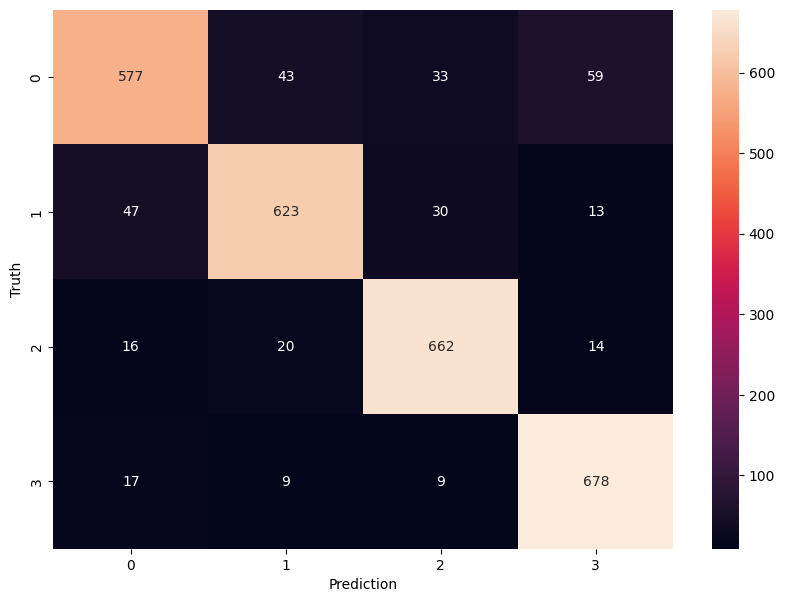

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')